-----------------------------------------------------
## Análise de Estacionariedade

#### Este notebook avalia as propriedades de estacionariedade das séries temporais utilizadas no modelo de demanda de energia, aplicando inspeção visual e testes formais de raiz unitária.
-----------------------------------------------------

In [48]:
import sys
from pathlib import Path

PROJECT_ROOT = Path("..").resolve()
sys.path.append(str(PROJECT_ROOT))

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display

from src.tests import build_stationarity_table, decision_stationarity
from src.config import DATA_INTERIM, RESULTS_TABLES, RESULTS_FIGURES
from src.utils import save_table_as_image

## Testes de estacionariedade

Antes da especificação econométrica, avalia-se a ordem de integração das séries por meio dos testes ADF e KPSS.

O teste ADF tem como hipótese nula a presença de raiz unitária, enquanto o teste KPSS assume estacionariedade sob a hipótese nula. A utilização conjunta permite maior robustez na inferência.

In [50]:
df = pd.read_csv(
    DATA_INTERIM / "base_consolidada_real.csv",
    parse_dates=["date"],
    index_col="date"
)

df.head()

,demanda_energia,importacoes_petroleo,tarifa_energia_real,pib_real
date,,,,
1997-01-01,9455000.0,34.30,467.377537,661215.689282
1997-02-01,9840000.0,40.08,450.907335,603200.965994
1997-03-01,9488000.0,34.76,458.226439,591156.246569
1997-04-01,9945000.0,33.11,458.327914,613668.044292
1997-05-01,10304000.0,34.56,514.755178,649538.842415


## Definição das variáveis do modelo

In [51]:
variables = [
    "demanda_energia",
    "tarifa_energia_real",
    "pib_real",
    "importacoes_petroleo"
]

## Análise Gráfica de Estacionariedade

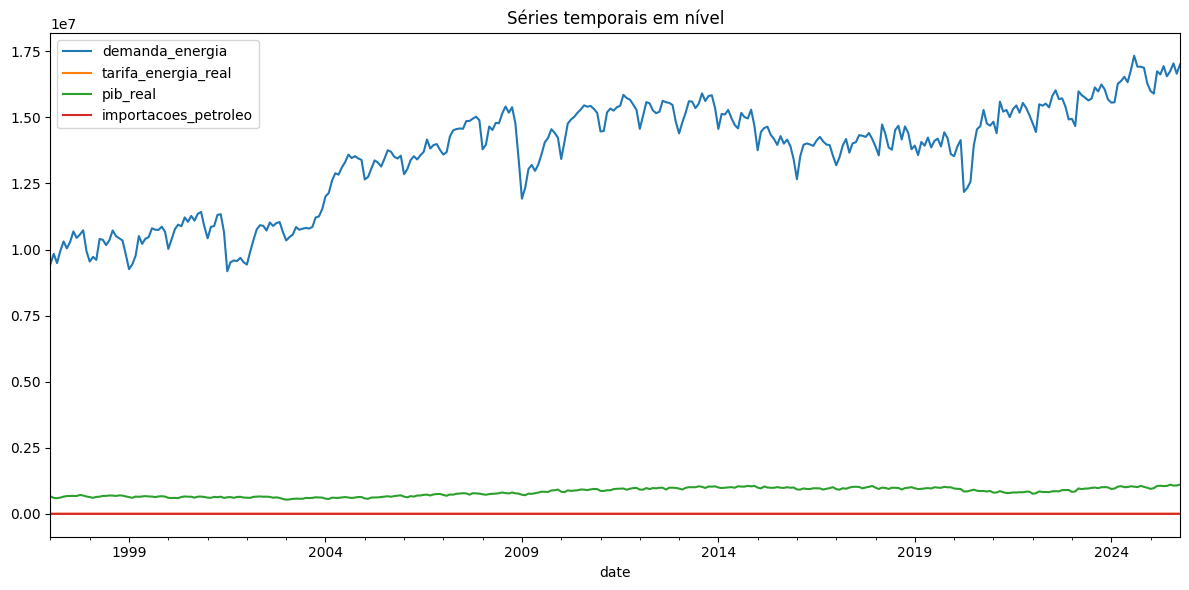

In [52]:
df[variables].plot(
    figsize=(12, 6),
    title="Séries temporais em nível"
)

plt.tight_layout()
plt.show()

## Resultado
- Os dados parecem ser não estacionários

In [53]:
table_level = build_stationarity_table(df, variables)

table_level["decisão"] = table_level.apply(
    decision_stationarity,
    axis=1
)

display(table_level)

C:\Users\Almyr Godoy\Desktop\Trabalhos e Análise de Dados\1.0 Projetos GITHUB\energy_demand_brazil\src\tests.py:97: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, pvalue, lags, _ = kpss(
C:\Users\Almyr Godoy\Desktop\Trabalhos e Análise de Dados\1.0 Projetos GITHUB\energy_demand_brazil\src\tests.py:97: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, pvalue, lags, _ = kpss(
C:\Users\Almyr Godoy\Desktop\Trabalhos e Análise de Dados\1.0 Projetos GITHUB\energy_demand_brazil\src\tests.py:97: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, pvalue, lags, _ = kpss(
C:\Users\Almyr Godoy\Desktop\Trabalhos e Análise de Dad

estatistica   p_valor  lags  n_obs  \
variavel             teste                                       
demanda_energia      ADF      -1.137291  0.699974    15  330.0   
                     KPSS      2.190327  0.010000    11    NaN   
importacoes_petroleo ADF      -2.191064  0.209505     1  344.0   
                     KPSS      1.329823  0.010000    11    NaN   
pib_real             ADF      -1.032706  0.741149    13  332.0   
                     KPSS      2.317839  0.010000    11    NaN   
tarifa_energia_real  ADF      -2.353802  0.155202    13  332.0   
                     KPSS      1.297145  0.010000    11    NaN   

                                     decisão  
variavel             teste                    
demanda_energia      ADF    Não estacionária  
                     KPSS   Não estacionária  
importacoes_petroleo ADF    Não estacionária  
                     KPSS   Não estacionária  
pib_real             ADF    Não estacionária  
                     KPSS   Não estacionária  
tarifa_energia_real  ADF    Não estacionária  
                     KPSS   Não estacionária

In [54]:
table_level.to_csv(
    RESULTS_TABLES / "stationarity_level.csv"
)

save_table_as_image(
    table_level,
    filename="stationarity_level.png",
    title="Testes de Estacionariedade  Séries em Nível",
    output_dir=RESULTS_FIGURES
)

In [55]:
df_log = np.log(df[variables])

In [56]:
table_log = build_stationarity_table(df_log, variables)

table_log["decisão"] = table_log.apply(
    decision_stationarity,
    axis=1
)

display(table_log)

C:\Users\Almyr Godoy\Desktop\Trabalhos e Análise de Dados\1.0 Projetos GITHUB\energy_demand_brazil\src\tests.py:97: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, pvalue, lags, _ = kpss(
C:\Users\Almyr Godoy\Desktop\Trabalhos e Análise de Dados\1.0 Projetos GITHUB\energy_demand_brazil\src\tests.py:97: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, pvalue, lags, _ = kpss(
C:\Users\Almyr Godoy\Desktop\Trabalhos e Análise de Dados\1.0 Projetos GITHUB\energy_demand_brazil\src\tests.py:97: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, pvalue, lags, _ = kpss(
C:\Users\Almyr Godoy\Desktop\Trabalhos e Análise de Dad

estatistica   p_valor  lags  n_obs  \
variavel             teste                                       
demanda_energia      ADF      -1.318138  0.620834    15  330.0   
                     KPSS      2.182342  0.010000    11    NaN   
importacoes_petroleo ADF      -1.633173  0.465830     1  344.0   
                     KPSS      1.629768  0.010000    11    NaN   
pib_real             ADF      -1.043192  0.737187    13  332.0   
                     KPSS      2.341634  0.010000    11    NaN   
tarifa_energia_real  ADF      -2.347704  0.157044    13  332.0   
                     KPSS      1.345228  0.010000    11    NaN   

                                     decisão  
variavel             teste                    
demanda_energia      ADF    Não estacionária  
                     KPSS   Não estacionária  
importacoes_petroleo ADF    Não estacionária  
                     KPSS   Não estacionária  
pib_real             ADF    Não estacionária  
                     KPSS   Não estacionária  
tarifa_energia_real  ADF    Não estacionária  
                     KPSS   Não estacionária

In [57]:
table_log.to_csv(
    RESULTS_TABLES / "stationarity_log.csv"
)

save_table_as_image(
    table_log,
    filename="stationarity_log.png",
    title="Testes de Estacionariedade – Séries em Log",
    output_dir=RESULTS_FIGURES
)

In [58]:
df_diff = df[variables].diff().dropna()

In [59]:
table_diff = build_stationarity_table(df_diff, variables)

table_diff["decisão"] = table_diff.apply(
    decision_stationarity,
    axis=1
)

display(table_diff)

C:\Users\Almyr Godoy\Desktop\Trabalhos e Análise de Dados\1.0 Projetos GITHUB\energy_demand_brazil\src\tests.py:97: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, pvalue, lags, _ = kpss(
C:\Users\Almyr Godoy\Desktop\Trabalhos e Análise de Dados\1.0 Projetos GITHUB\energy_demand_brazil\src\tests.py:97: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, pvalue, lags, _ = kpss(
C:\Users\Almyr Godoy\Desktop\Trabalhos e Análise de Dados\1.0 Projetos GITHUB\energy_demand_brazil\src\tests.py:97: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, pvalue, lags, _ = kpss(
C:\Users\Almyr Godoy\Desktop\Trabalhos e Análise de Dad

estatistica       p_valor  lags  n_obs  \
variavel             teste                                           
demanda_energia      ADF      -5.418978  3.089799e-06    14  330.0   
                     KPSS      0.078940  1.000000e-01    17    NaN   
importacoes_petroleo ADF     -11.406907  7.411232e-21     0  344.0   
                     KPSS      0.069185  1.000000e-01     7    NaN   
pib_real             ADF      -3.988109  1.474071e-03    17  327.0   
                     KPSS      0.099356  1.000000e-01    43    NaN   
tarifa_energia_real  ADF      -4.986567  2.359255e-05    12  332.0   
                     KPSS      0.035076  1.000000e-01     4    NaN   

                                 decisão  
variavel             teste                
demanda_energia      ADF    Estacionária  
                     KPSS   Estacionária  
importacoes_petroleo ADF    Estacionária  
                     KPSS   Estacionária  
pib_real             ADF    Estacionária  
                     KPSS   Estacionária  
tarifa_energia_real  ADF    Estacionária  
                     KPSS   Estacionária

In [60]:
table_diff.to_csv(
    RESULTS_TABLES / "stationarity_diff.csv"
)

save_table_as_image(
    table_diff,
    filename="stationarity_diff.png",
    title="Testes de Estacionariedade – Primeira Diferença",
    output_dir=RESULTS_FIGURES
)

## Conclusão

Os resultados indicam que as séries apresentam comportamento não estacionário em nível, tornando-se estacionárias após transformação logarítmica e/ou diferenciação de primeira ordem.

Esses resultados orientam a escolha do modelo econométrico nas etapas seguintes, justificando o uso de modelos com diferenciação ou estrutura dinâmica.